# Reward Data Intern - Recruitment Assignment

## Task 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset into a DataFrame
df1 = pd.read_csv(r"C:\Users\Toyosi\Documents\Sand Technologies\_Data Sets Reward_Program_Assignment_Input_v6 - TA.xlsx - Mentorship_Sessions.csv")
df1

,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded
0,2001.0,1003.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN
1,2002.0,1003.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN
2,2003.0,1005.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN
3,4.0,1005.0,David Thompson,NaN,2.0,50.0,Yes,2023-01-22,NaN
4,2001.0,1004.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN
...,...,...,...,...,...,...,...,...,...
104,2002.0,1003.0,Michael Lee,Carol White,2.0,20.0,No,2024-08-04,NaN
105,54.0,1003.0,Michael Lee,Alice Johnson,2.0,30.0,Yes,2024-01-07,NaN
106,2003.0,1005.0,Michael Lee,Jane Smith,1.0,50.0,Yes,2024-05-05,NaN
107,46.0,1005.0,Michael Lee,Carol White,2.0,40.0,Yes,2023-11-12,NaN


In [3]:
# Collating information on the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            108 non-null    float64
 1   Mentor_ID             108 non-null    float64
 2   Mentor_Name           109 non-null    object 
 3   Mentee_Name           107 non-null    object 
 4   Session_Number        108 non-null    float64
 5   Session_Duration_Min  107 non-null    float64
 6   Job_Info_Completed    108 non-null    object 
 7   Session_Date          108 non-null    object 
 8   Points_Awarded        0 non-null      float64
dtypes: float64(5), object(4)
memory usage: 7.8+ KB


In [4]:
df1.describe()

,Unnamed: 0,Mentor_ID,Session_Number,Session_Duration_Min,Points_Awarded
count,108.000000,108.000000,108.000000,107.000000,0.0
mean,1389.092593,1003.287037,1.481481,32.990654,NaN
std,909.079195,1.381121,0.501986,10.834514,NaN
min,4.000000,1001.000000,1.000000,20.000000,NaN
25%,83.000000,1002.000000,1.000000,20.000000,NaN
50%,2001.000000,1003.000000,1.000000,30.000000,NaN
75%,2002.000000,1004.000000,2.000000,40.000000,NaN
max,2006.000000,1005.000000,2.000000,50.000000,NaN


In [5]:
# Dropping null values from columns   
df1.dropna(subset = ['Mentee_Name', 'Session_Duration_Min'], inplace= True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 108
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            106 non-null    float64
 1   Mentor_ID             106 non-null    float64
 2   Mentor_Name           106 non-null    object 
 3   Mentee_Name           106 non-null    object 
 4   Session_Number        106 non-null    float64
 5   Session_Duration_Min  106 non-null    float64
 6   Job_Info_Completed    106 non-null    object 
 7   Session_Date          106 non-null    object 
 8   Points_Awarded        0 non-null      float64
dtypes: float64(5), object(4)
memory usage: 8.3+ KB


In [6]:
# Finding all unique values in column
df1['Unnamed: 0'].unique()

array([2001., 2002., 2003., 2004., 2005.,   13.,   16., 2006.,   22.,
         24.,   25.,   28.,   30.,   34.,   19.,   38.,   39.,   41.,
         44.,   55.,   62.,   64.,   65.,   68.,   70.,   71.,   74.,
         75.,   80.,   84.,   85.,   89.,   90.,   96.,   98.,  100.,
         54.,   46.,   45.])

In [7]:
# Correcting wrong entries in column
df1['Unnamed: 0'] = df1['Unnamed: 0'].replace({2001:1, 2002:2, 2003:3, 2004:4, 2005:5, 2006:6})
df1['Unnamed: 0'].unique()

array([  1.,   2.,   3.,   4.,   5.,  13.,  16.,   6.,  22.,  24.,  25.,
        28.,  30.,  34.,  19.,  38.,  39.,  41.,  44.,  55.,  62.,  64.,
        65.,  68.,  70.,  71.,  74.,  75.,  80.,  84.,  85.,  89.,  90.,
        96.,  98., 100.,  54.,  46.,  45.])

In [8]:
df1["Mentor_ID"].unique()

array([1003., 1005., 1004., 1002., 1001.])

In [9]:
df1["Mentor_Name"].unique()

array(['Sarah Clark', 'Emily Davis', 'James Wilson', 'David Thompson',
       'Michael Lee'], dtype=object)

In [10]:
# Mapping mentor IDs to mentor names
ID_mapping  = {
'David Thompson': 1001,
'Emily Davis': 1002,
'James Wilson': 1003,
'Michael Lee': 1004,
'Sarah Clark': 1005
}

for name, id in ID_mapping.items():
    df1.loc[df1["Mentor_Name"] == name, "Mentor_ID"] = id

In [11]:
df1['Mentee_Name'].unique()

array(['Bob Brown', 'Carol White', 'Jane Smith', 'John Doe',
       'Alice Johnson'], dtype=object)

In [12]:
df1['Unnamed: 0'].unique()

array([  1.,   2.,   3.,   4.,   5.,  13.,  16.,   6.,  22.,  24.,  25.,
        28.,  30.,  34.,  19.,  38.,  39.,  41.,  44.,  55.,  62.,  64.,
        65.,  68.,  70.,  71.,  74.,  75.,  80.,  84.,  85.,  89.,  90.,
        96.,  98., 100.,  54.,  46.,  45.])

In [13]:
# Mapping mentee IDs to mentee names
mentee_id = {
'Bob Brown': 1.0,
'Carol White': 2.0,
'Jane Smith': 3.0,
'John Doe': 4.0,
'Alice Johnson': 5.0
}

for name, id in mentee_id.items():
    df1.loc[df1["Mentee_Name"] == name, "Unnamed: 0"] = id
df1.head()

,Unnamed: 0,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded
0,1.0,1005.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN
1,2.0,1002.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN
2,3.0,1003.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN
4,1.0,1002.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN
5,3.0,1001.0,David Thompson,Jane Smith,2.0,50.0,No,2023-02-05,NaN


In [14]:
# Renaming column
df1.rename(columns={'Unnamed: 0': 'Mentee_ID'}, inplace = True)
df1.head()

,Mentee_ID,Mentor_ID,Mentor_Name,Mentee_Name,Session_Number,Session_Duration_Min,Job_Info_Completed,Session_Date,Points_Awarded
0,1.0,1005.0,Sarah Clark,Bob Brown,1.0,40.0,Yes,2023-01-01,NaN
1,2.0,1002.0,Emily Davis,Carol White,2.0,30.0,Yes,2023-01-08,NaN
2,3.0,1003.0,James Wilson,Jane Smith,2.0,40.0,Yes,2023-01-15,NaN
4,1.0,1002.0,Emily Davis,Bob Brown,1.0,30.0,No,2023-01-29,NaN
5,3.0,1001.0,David Thompson,Jane Smith,2.0,50.0,No,2023-02-05,NaN


### Brief Report
The purpose of this report is to detail the process, tools, and findings of cleaning the "Mentorship_Sessions" dataset. The dataset contains information about mentorship sessions, but due to data inconsistencies and duplicates, it was impacting the accurate allocation of rewards to graduates and learners. This report highlights the steps taken to ensure the data is accurate, clean, and ready for analysis

**Tools Used:**
- Python (Pandas Library): Automated data cleaning, handling large datasets efficiently, and running data quality checks.

**Data Cleaning Process:**
1. **Inspecting Data:** The first step was to inspect the dataset for any immediate irregularities, such as missing values, formatting errors, or duplicate records. Using pandas info and describe function, I manually reviewed columns for empty cells and obvious outliers. This step heped in understanding the structure of data and identifying patterns of errors.
2. **Handling Missing Data:**  I noticed irregularities in the shape of the 'Mentee_Name' and 'Session_Duration_Min' columns when the non-null values where provided. The irregularity was addressed by dropping all null values within those columns, 3 entries were dropped.
3. **Correcting Inconsistencies:**
Several inconsistencies were found, particularly in date formats and mentor names. Outliers were noted in the values of the 'Unnamed: 0' column. There was no linearity in the relationship between columns representing names and their IDs.  The 'Unnamed: 0' column is improperly named. The irregularities mentioned above were addressed by 

    - Correcting Inconsistencies.
    - Checking for duplicate entries.

**Conclusion:** The data is now accurate and ready for use in further analysis and reporting.

## Task 2

In [15]:
#Initializing a dataframe to store the final points for each mentor
Ment_id = df1['Mentor_ID'].unique()
mentor_points = pd.DataFrame(Ment_id, columns=['Mentor_id'])
mentor_points['Points_Earned'] = 0

# Function to calculate points
def calculate_points(df1, mentor):
    points = 250  # Initializing points for mentor
    mentor_df = df1[df1['Mentor_ID'] == mentor]
    
    # Create a mentee groups to ensure points are calculated for each mentee
    mentee_groups = mentor_df.groupby('Mentee_ID')

    for _, mentee_sessions in mentee_groups:
        # Create a condition for at least 2 sessions with both 30 minutes or longer
        valid_sessions = mentee_sessions[mentee_sessions['Session_Duration_Min'] >= 30]
        if len(valid_sessions) >= 2:
            # Check if job info was provided in at least one session
            job_info_provided = 'Yes' in mentee_sessions['Job_Info_Completed'].values
            if job_info_provided:
                points += 500  # Full 500 points for a complete mentorship cycle
            else:
                points += 250  # Partial points for mentorship without job info

    return points

# Calculate points for each mentor
mentor_points['Points_Earned'] = mentor_points['Mentor_id'].apply(lambda mentor: calculate_points(df1, mentor))

mentor_points


,Mentor_id,Points_Earned
0,1005.0,2250
1,1002.0,2250
2,1003.0,2000
3,1001.0,2500
4,1004.0,2750


In [16]:
mentor_points['Mentor_Name'] = df1['Mentor_Name'].unique()
mentor_points

,Mentor_id,Points_Earned,Mentor_Name
0,1005.0,2250,Sarah Clark
1,1002.0,2250,Emily Davis
2,1003.0,2000,James Wilson
3,1001.0,2500,David Thompson
4,1004.0,2750,Michael Lee


### Brief Report
This report details the process, tools,and findings of point allocation for the "Mentorship_Sessions" dataset.

**Tools Used:**
- Python (Pandas): For data manipulation and point calculation.

**Process Overview:**

1. **Data Cleaning and Preparation:** The dataset was cleaned and irregular or errenous entries were filtered out.

2. **Criteria Review:**
    - Mentors earn 250 points for signing up (one-time allocation).
    - Mentors earn 1000 points for conducting mentorship with 2 different mentees.
    - Mentors earn 500 points per mentorship relationship, with points awarded based on: 250 points per session.
    - A maximum of 500 points per mentee after completing two sessions.
    - At least one session must include the completion of job information.
    - Each session must be a minimum of 30 minutes in length.

3.  **Calculation Explanation:** For each mentor, the following logic was applied:
    - A new dataframe was created to store the mentor's id and their respective points allocation.
    - A function was created to calculate the points while having the initial points for a unique id at 250.
    - I grouped each unique ids based on the mentee ids.
    - I created a for loop with conditions stating that while 2 sessions both run for at least 30 minutes or longer, if the number of sessions are greater than or equal to two while job info is provided, 500 points are awarded, else, 250 points. 

**Conclusion:** The point allocation was successfully completed using a structured and tested approach. Mentors were rewarded based on the rules provided, and the system accurately reflected their contributions to the mentorship program.

## Task 3

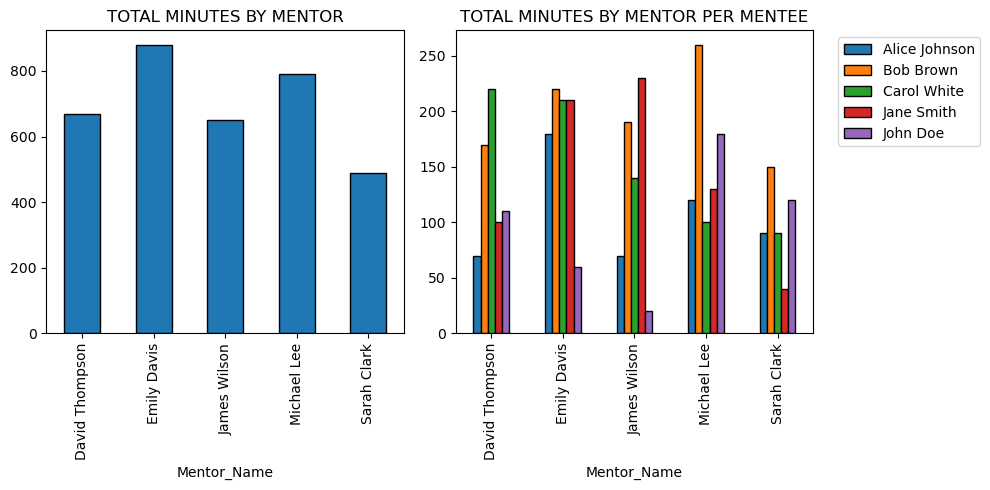

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

# First plot on the first axis
Mentee_min = df1.groupby(['Mentor_Name'])['Session_Duration_Min'].sum()
Mentee_min.plot(kind='bar', edgecolor='black', ax=axs[0], title='TOTAL MINUTES BY MENTOR')

# Second plot on the second axis
Total_min = df1.groupby(['Mentor_Name', 'Mentee_Name'])['Session_Duration_Min'].sum().unstack()
Total_min.plot(kind='bar', edgecolor='black', ax=axs[1], title='TOTAL MINUTES BY MENTOR PER MENTEE')

# Show the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


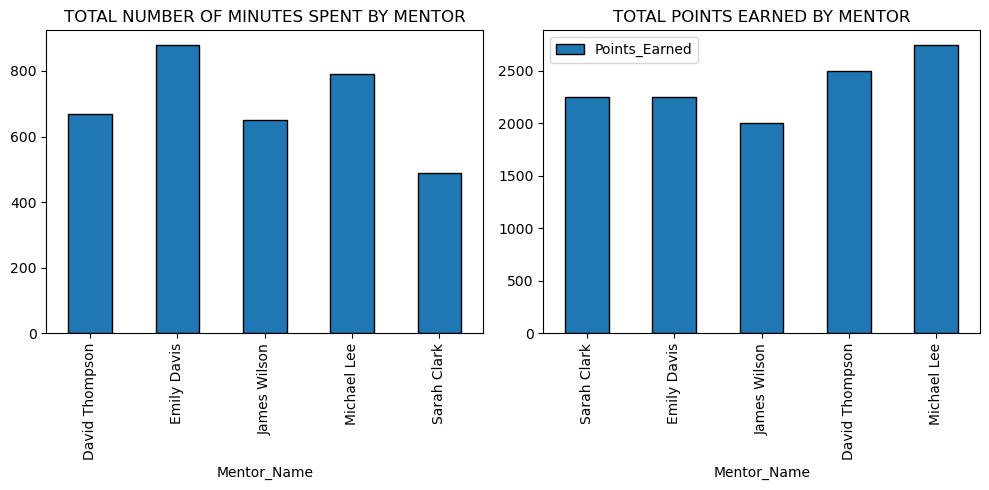

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

# First plot on the first axis
Mentee_min = df1.groupby(['Mentor_Name'])['Session_Duration_Min'].sum()
Mentee_min.plot(kind='bar', edgecolor='black', ax=axs[0], title='TOTAL NUMBER OF MINUTES SPENT BY MENTOR')

# Second plot on the second axis
mentor_points.plot('Mentor_Name', 'Points_Earned', kind='bar', edgecolor='black', ax=axs[1], title='TOTAL POINTS EARNED BY MENTOR')

# Show the figure
plt.tight_layout()
plt.show()

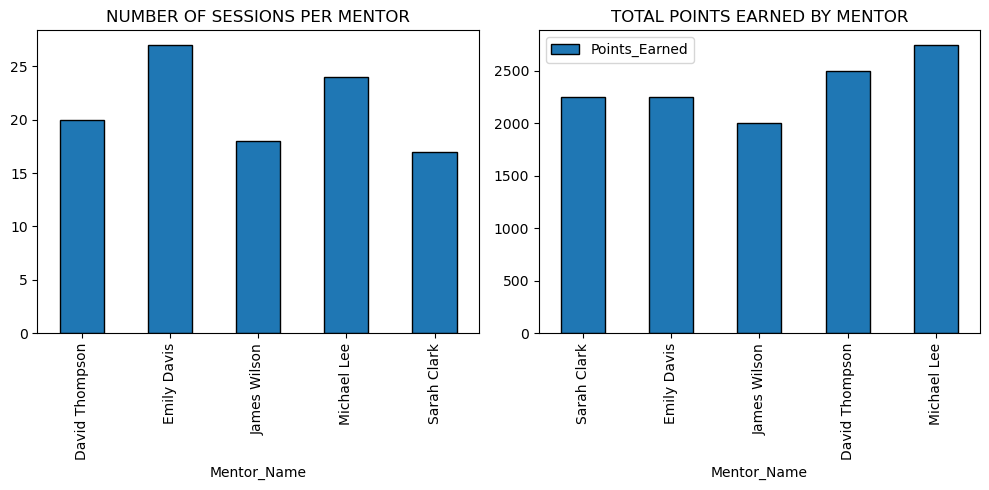

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

# First plot on the first axis
Session_num = df1.groupby(['Mentor_Name'])['Session_Number'].count()#.unstack()
Session_num.plot(kind='bar', edgecolor='black', figsize=(10, 5), ax=axs[0], title='NUMBER OF SESSIONS PER MENTOR')

# Second plot on the second axis
mentor_points.plot('Mentor_Name', 'Points_Earned', kind='bar', edgecolor='black', ax=axs[1], title='TOTAL POINTS EARNED BY MENTOR')

# Show the figure
plt.tight_layout()
plt.show()

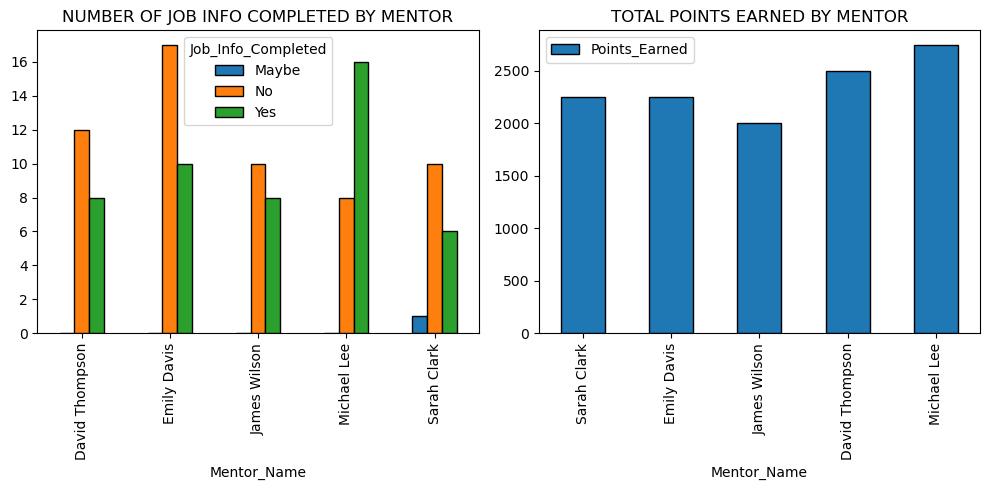

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

# First plot on the first axis
Session_num = df1.groupby(['Mentor_Name'])['Job_Info_Completed'].value_counts().unstack()
Session_num.plot(kind='bar', edgecolor='black', figsize=(10, 5), ax=axs[0], title='NUMBER OF JOB INFO COMPLETED BY MENTOR')


# Second plot on the second axis
mentor_points.plot('Mentor_Name', 'Points_Earned', kind='bar', edgecolor='black', ax=axs[1], title='TOTAL POINTS EARNED BY MENTOR')

# Show the figure
plt.tight_layout()
plt.show()